In [1]:
import os, sys, time
from scipy import stats
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import numpy as np
%matplotlib inline

from IPython.display import display, HTML

if (sys.version_info < (3, 0)):
    HTML('''<script>
    code_show=true; 
    function code_toggle() {
     if (code_show){
     $('div.input').hide();
     } else {
     $('div.input').show();
     }
     code_show = !code_show
    } 
    $( document ).ready(code_toggle);
    </script>
    <form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


In [2]:
# Create timestamp to show when this summary was run
print('Summary run: ' + time.strftime("%a, %d %b %Y %H:%M"))

Summary run: Mon, 03 Jun 2024 15:10


In [3]:
relative_path = '../../../../outputs'
pd.options.display.float_format = '{:0,.0f}'.format
format_percent = "{:,.2%}".format

# Traffic Counts
----
### Daily | By Facility Type

In [4]:
df = pd.read_csv(os.path.join(relative_path,'validation','daily_volume.csv'))
df[['modeled','observed']] = df[['modeled','observed']].astype('float')

In [5]:
_df = df.groupby('@facilitytype').sum()[['observed','modeled']]
_df.loc['Total',:] = _df.sum().values
_df['diff'] = _df['modeled']-_df['observed']
_df['percent_diff'] = _df['diff']/_df['observed']
_df[['percent_diff']] = _df[['percent_diff']].applymap(format_percent)
_df

,observed,modeled,diff,percent_diff
@facilitytype,,,,
Arterial,"25,783,951","22,622,847","-3,161,104",-12.26%
Collector,"4,378,889","3,382,432","-996,457",-22.76%
Freeway,"28,073,146","28,354,428","281,282",1.00%
Ramp,"756,602","611,532","-145,070",-19.17%
Total,"58,992,588","54,971,239","-4,021,349",-6.82%


----
### Daily | By County

In [6]:
df = pd.read_csv(os.path.join(relative_path,'validation','daily_volume_county_facility.csv'))
df[['modeled','observed']] = df[['modeled','observed']].astype('float')

_df = df.groupby('county').sum()[['observed','modeled']]
_df.loc['Total',:] = _df.sum().values
_df['diff'] = _df['modeled']-_df['observed']
_df['percent_diff'] = _df['diff']/_df['observed']
_df[['percent_diff']] = _df[['percent_diff']].applymap(format_percent)
_df

,observed,modeled,diff,percent_diff
county,,,,
King,"31,190,923","30,003,292","-1,187,631",-3.81%
Kitsap,"4,567,541","3,664,961","-902,580",-19.76%
Pierce,"13,634,217","12,763,401","-870,816",-6.39%
Snohomish,"9,599,907","8,539,585","-1,060,322",-11.05%
Total,"58,992,588","54,971,239","-4,021,349",-6.82%


----
### Daily | Scatterplots 

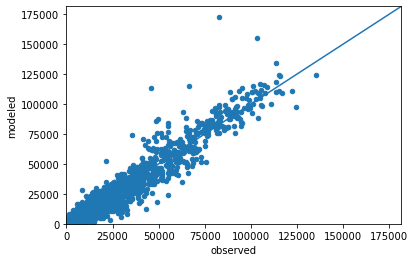

In [7]:
df = pd.read_csv(os.path.join(relative_path,'validation','daily_volume.csv'))
ax = df.plot(kind='scatter', x='observed', y='modeled')
lim = df[['observed','modeled']].max().max()*1.05
ax.set_ylim(0,lim)
ax.set_xlim(0,lim)
x = np.linspace(*ax.get_xlim())
ax.plot(x, x)

In [8]:
slope, intercept, r_value, p_value, std_err = stats.linregress(df['observed'],df['modeled'])
print('r^2: ' + str(r_value))

r^2: 0.9625769491042856


---
By County

King r^2: 0.9739701313763108
Kitsap r^2: 0.9511756251745296
Pierce r^2: 0.9420551618144336
Snohomish r^2: 0.9566162250711018


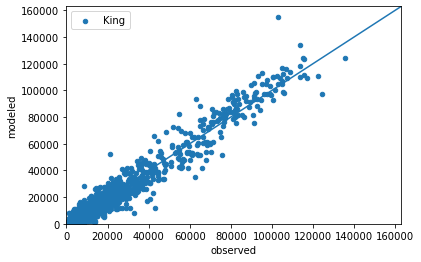

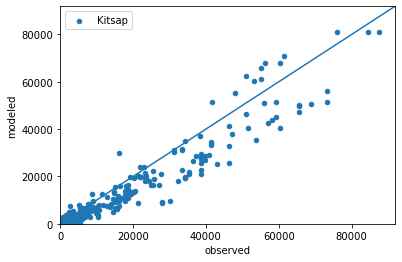

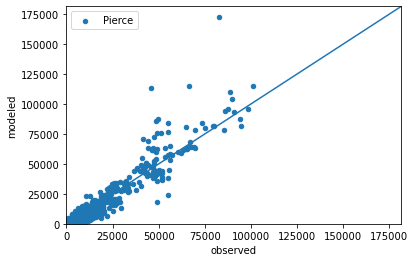

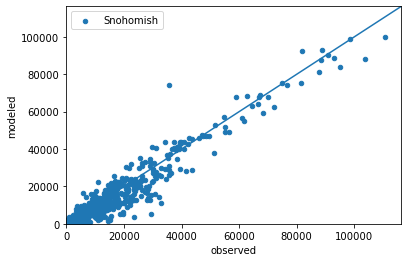

In [9]:
for county in np.unique(df['county']):
    _df = df[df['county'] == county]
    ax = _df.plot(kind='scatter', x='observed', y='modeled', label=county)
    lim = _df[['observed','modeled']].max().max()*1.05
    ax.set_ylim(0,lim)
    ax.set_xlim(0,lim)
    slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed'],_df['modeled'])
    x = np.linspace(*ax.get_xlim())
    ax.plot(x, x)
    print(str(county) + ' r^2: ' + str(r_value))

---
By Facility Type

r^2 Freeway: 0.9196063172917682
r^2 Arterial: 0.8754252730299198


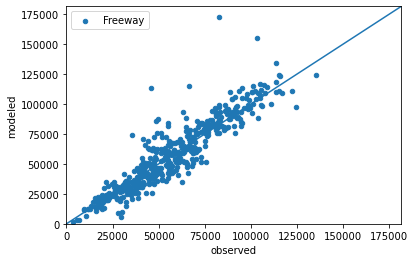

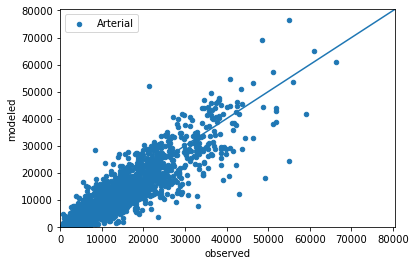

In [10]:
for factype in ['Freeway','Arterial']:
    _df = df[df['@facilitytype'] == factype]
    ax = _df.plot(kind='scatter', x='observed', y='modeled', label=factype)
    lim = _df[['observed','modeled']].max().max()*1.05
    ax.set_ylim(0,lim)
    ax.set_xlim(0,lim)
    x = np.linspace(*ax.get_xlim())
    ax.plot(x, x)
    slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed'],_df['modeled'])
    print('r^2 ' + str(factype) + ': ' + str(r_value))

**Hourly Volumes**


r^2: 0.9058036439184396


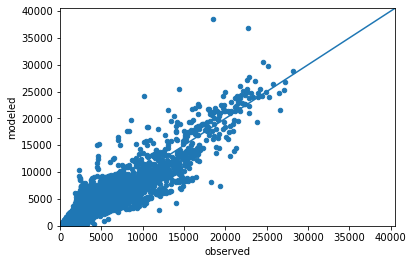

In [11]:
df = pd.read_csv(os.path.join(relative_path,'validation','hourly_volume.csv'))
ax = df.plot(kind='scatter', x='observed', y='modeled')
lim = df[['observed','modeled']].max().max()*1.05
ax.set_ylim(0,lim)
ax.set_xlim(0,lim)
x = np.linspace(*ax.get_xlim())
ax.plot(x, x)
slope, intercept, r_value, p_value, std_err = stats.linregress(df['observed'],df['modeled'])
print('r^2: ' + str(r_value))

# Screenlines

In [12]:
df = pd.read_csv(os.path.join(relative_path,'validation','screenlines.csv'))
df = df.append(df.sum(numeric_only=True), ignore_index=True)
df.at[df.index[-1], 'name'] = 'TOTAL'
#df.at['C', 'name'] = 10
df['percent_diff'] = df['diff']/df['observed']
df[['percent_diff']] = df[['percent_diff']].applymap(format_percent)
df

,name,observed,modeled,county,diff,percent_diff
0,AUBURN - SOUTH KING,"582,116","532,373",King,"-49,743",-8.55%
1,KENT,"552,442","500,855",King,"-51,587",-9.34%
2,SEATTLE - SOUTH OF CBD,"473,322","501,809",King,"28,487",6.02%
3,SHIP CANAL,"434,069","541,543",King,"107,474",24.76%
4,SOUTH BELLEVUE,"389,700","377,190",King,"-12,510",-3.21%
5,MILL CREEK,"387,047","377,357",King,"-9,690",-2.50%
6,KIRKLAND-REDMOND,"381,663","409,398",King,"27,735",7.27%
7,SEATTLE - NORTH,"341,251","378,870",King,"37,619",11.02%
8,TACOMA - EAST OF CBD,"300,463","355,223",Pierce,"54,760",18.23%
9,PARKLAND,"297,722","275,882",Pierce,"-21,840",-7.34%


r^2 : 0.98035632053776


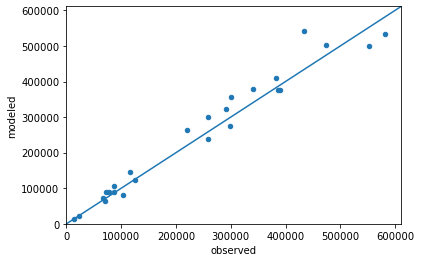

In [13]:
df = df.head(-1)
ax = df.plot(kind='scatter', x='observed', y='modeled')
lim = df[['observed','modeled']].max().max()*1.05
ax.set_ylim(0,lim)
ax.set_xlim(0,lim)
x = np.linspace(*ax.get_xlim())
ax.plot(x, x)
slope, intercept, r_value, p_value, std_err = stats.linregress(df['observed'],df['modeled'])
print('r^2 : ' + str(r_value))

# Transit Boarding
----
### By Agency

In [14]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'daily_boardings_by_agency.csv')

df[['observed_5to20','modeled_5to20','diff']] = df[['observed_5to20','modeled_5to20','diff']].astype('float')
df[['perc_diff']] = df[['perc_diff']].applymap(format_percent)
df.sort_values('observed_5to20', ascending=False)

,agency,observed_5to20,modeled_5to20,diff,perc_diff
0,King County Metro,"2,313","596,911","594,598","25,706.81%"


----
### Key Routes
#### Ferries

In [15]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'daily_boardings_key_routes.csv', index_col='description')
df[['observed_5to20','modeled_5to20']] = df[['observed_5to20','modeled_5to20']].astype('float')
_df = df[df['route_code'].isin([5001,5002,5003,5004,5005,5006,5007,1973,1975])].reset_index()
_df.drop(['route_code','agency'], axis=1, inplace=True)
_df[['perc_diff']] = _df[['perc_diff']].applymap(format_percent)
_df

,description,observed_5to20,modeled_5to20,diff,perc_diff


In [16]:
if len(_df) > 0:
    ax = _df.plot(kind='scatter', x='observed_5to20', y='modeled_5to20')
    lim = _df[['observed_5to20','modeled_5to20']].max().max()*1.05
    ax.set_ylim(0,lim)
    ax.set_xlim(0,lim)
    x = np.linspace(*ax.get_xlim())
    ax.plot(x, x)
    slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed_5to20'],_df['modeled_5to20'])
    print('r^2 ' + str('') + ': ' + str(r_value))

#### Bikes on Ferries

In [17]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'bike_ferry_boardings.csv')
df['route_code'] = df['route_code'].astype('int')
df[['route_code','description', '@bvol']].sort_values('@bvol', ascending=False)

,route_code,description,@bvol
0,1001,E,"4,225"


#### Rail

In [18]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'daily_boardings_key_routes.csv', index_col='description')
df[['observed_5to20','modeled_5to20']] = df[['observed_5to20','modeled_5to20']].astype('float')
_df = df[df['route_code'].isin([6996,6999,6998])].reset_index()
_df['description'] = _df['route_code'].map({6998: 'Sounder South', 6999: 'Sounder North',6996: 'Link Red Line'})
_df.drop(['route_code','agency'], axis=1, inplace=True)
_df[['perc_diff']] = _df[['perc_diff']].applymap(format_percent)

_df

,description,observed_5to20,modeled_5to20,diff,perc_diff


In [19]:
if len(_df) > 0: 
    ax = _df.plot(kind='scatter', x='observed_5to20', y='modeled_5to20')
    lim = _df[['observed_5to20','modeled_5to20']].max().max()*1.05
    ax.set_ylim(0,lim)
    ax.set_xlim(0,lim)
    x = np.linspace(*ax.get_xlim())
    ax.plot(x, x)
    slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed_5to20'],_df['modeled_5to20'])
    print('r^2 ' + str('') + ': ' + str(r_value))

#### RapidRide, Busiest Buses, Streetcar

In [20]:
_df = df[df['route_code'].isin([1671,1672,1673,1674,1675,1676,6550,1007,1040,1997,1998])].reset_index()
_df['description'] = _df['route_code'].map({1671: 'A Line RapidRide', 1672: 'B Line RapidRide',
                                            1673: 'C Line RapidRide', 1674: 'D Line RapidRide',
                                            1675: 'E Line RapidRide', 1676: 'F Line RapidRide',
                                            6550: 'Sound Transit 550', 1040: 'KC Metro 40', 1007: 'KC Metro 7',
                                            1997: 'SLU Streetcar', 1998: 'First Hill Streetcar'})
_df.drop(['route_code','agency'], axis=1, inplace=True)
_df[['perc_diff']] = _df[['perc_diff']].applymap(format_percent)
_df.sort_values('modeled_5to20', ascending=False)

,description,observed_5to20,modeled_5to20,diff,perc_diff


In [21]:
if len(_df) > 0: 
    ax = _df.plot(kind='scatter', x='observed_5to20', y='modeled_5to20')
    lim = _df[['observed_5to20','modeled_5to20']].max().max()*1.05
    ax.set_ylim(0,lim)
    ax.set_xlim(0,lim)
    x = np.linspace(*ax.get_xlim())
    ax.plot(x, x)
    slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed_5to20'],_df['modeled_5to20'])
    print('r^2 ' + str('') + ': ' + str(r_value))

---
### Lines by Agency

In [22]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'daily_boardings_by_line.csv', index_col='agency')
df = df[-df['agency_id'].isnull()]

for agency in np.unique(df.index):
    _df = df.loc[agency,:]
    if (type(_df) == pd.core.frame.DataFrame) & (len(df) > 0):
        ax = _df.plot(kind='scatter', x='observed_5to20', y='modeled_5to20', label=agency)
        lim = _df[['observed_5to20','modeled_5to20']].max().max()*1.05
        ax.set_ylim(0,lim)
        ax.set_xlim(0,lim)
        x = np.linspace(*ax.get_xlim())
        ax.plot(x, x)
        slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed_5to20'],_df['modeled_5to20'])
        print('r^2 ' + str(agency) + ': ' + str(r_value))

# Light Rail Station Boardings
----
Red Line

In [23]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'light_rail_boardings.csv', index_col='station_name')
df['diff'] = df['modeled_5to20']-df['observed_5to20']
df['percent_diff'] = df['diff']/df['observed_5to20']
df[['percent_diff']] = df[['percent_diff']].applymap(format_percent)
df

,observed_5to20,modeled_5to20,diff,percent_diff
station_name,,,,
Husky Stadium,"5,492","3,451","-2,041",-37.16%
Westlake,"7,919","9,708","1,789",22.60%
University St,"3,871","6,928","3,057",78.97%
Pioneer Square,"2,149","5,277","3,129",145.61%
Int'l District,"3,938","1,895","-2,044",-51.90%
Capitol Hill,"6,864","6,647",-217,-3.16%
Stadium,"1,550",553,-997,-64.30%
SODO,"1,494","3,206","1,712",114.54%
Beacon Hill,"1,922",920,"-1,002",-52.15%


Sound Transit Station Groupings

In [24]:
df_combined = df.copy()

df_combined['station_group'] = df.index
df_combined.loc[['Westlake'],'station_group'] = 'Westlake/University St'
df_combined.loc[['University St'],'station_group'] = 'Westlake/University St'

df_combined.loc[['Pioneer Square'],'station_group'] = "Pioneer Square/Int'l District"
df_combined.loc[["Int'l District"],'station_group'] = "Pioneer Square/Int'l District"

df_combined.loc[['Stadium'],'station_group'] = 'Stadium/SODO'
df_combined.loc[['SODO'],'station_group'] = 'Stadium/SODO'

df_combined.loc[['Beacon Hill'],'station_group'] = 'Beacon Hill/Mount Baker'
df_combined.loc[['Mount Baker'],'station_group'] = 'Beacon Hill/Mount Baker'

df_combined.loc[['Othello'],'station_group'] = 'Othello/Rainier Beach'
df_combined.loc[['Rainier Beach'],'station_group'] = 'Othello/Rainier Beach'

df_combined = df_combined.groupby('station_group').sum()[['observed_5to20','modeled_5to20']]
df_combined['diff'] = df_combined['modeled_5to20']-df_combined['observed_5to20']
df_combined['percent_diff'] = df_combined['diff']/df_combined['observed_5to20']
df_combined[['percent_diff']] = df_combined[['percent_diff']].applymap(format_percent)

df_combined.loc[['Husky Stadium','Capitol Hill','Westlake/University St',"Pioneer Square/Int'l District",
                 'Stadium/SODO','Beacon Hill/Mount Baker','Columbia City','Othello/Rainier Beach',
                "Tukwila Int'l Blvd",'SeaTac/Airport','Angle Lake']]

,observed_5to20,modeled_5to20,diff,percent_diff
station_group,,,,
Husky Stadium,"5,492","3,451","-2,041",-37.16%
Capitol Hill,"6,864","6,647",-217,-3.16%
Westlake/University St,"11,790","16,637","4,847",41.11%
Pioneer Square/Int'l District,"6,087","7,172","1,085",17.82%
Stadium/SODO,"3,044","3,759",715,23.49%
Beacon Hill/Mount Baker,"3,588","2,002","-1,587",-44.22%
Columbia City,"1,459","1,052",-407,-27.89%
Othello/Rainier Beach,"3,156","2,502",-653,-20.70%
Tukwila Int'l Blvd,"2,057","1,787",-270,-13.13%


# Stop Transfers

### Light Rail

In [25]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'light_rail_transfers.csv', index_col='station_name')
pd.options.display.float_format = '{:0,.2f}'.format
df[['percent_diff']] = df[['percent_diff']].applymap(format_percent)
df

,modeled_transfer_rate,observed_transfer_rate,diff,percent_diff
station_name,,,,
Husky Stadium,0.86,-99.00,99.86,-100.87%
Westlake,0.18,0.36,-0.18,-50.48%
University St,0.32,0.20,0.12,59.85%
Pioneer Square,0.42,0.16,0.26,163.43%
Int'l District,0.61,0.45,0.16,36.50%
Capitol Hill,0.06,-99.00,99.06,-100.07%
Stadium,0.28,0.12,0.16,135.09%
SODO,0.57,0.31,0.26,82.85%
Beacon Hill,0.36,0.35,0.01,2.21%


# Externals

In [26]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'external_volumes.csv', index_col='location')
pd.options.display.float_format = '{:0,.0f}'.format
df = df.drop('diff', axis=1)
df['diff'] = df['modeled']-df['observed']
df = df.fillna(0)
df.loc['Total',['observed','modeled','diff']] = df[['observed','modeled','diff']].sum()
df['percent_diff'] = df['diff']/df['observed']
df[['percent_diff']] = df[['percent_diff']].applymap(format_percent)

df[['external_station']] = df[['external_station']].applymap('{:0.0f}'.format)
df.replace('nan', '', regex=True)

,external_station,county,observed,modeled,diff,percent_diff
location,,,,,,
I-5 to Olympia,3733,Pierce,"132,000","124,669","-7,331",-5.55%
I-5 to Mount Vernon,3744,Snohomish,"64,400","57,988","-6,412",-9.96%
I-90 @ Snoqualmie Pass,3739,King,"33,800","29,757","-4,043",-11.96%
SR-507 to Yelm,3734,Pierce,"21,800","19,816","-1,984",-9.10%
SR-532 to Camano Island,3746,Snohomish,"20,700","20,216",-484,-2.34%
SR-3 to Belfair,3749,Kitsap,"18,400","16,415","-1,985",-10.79%
Hood Canal Bridge,3748,Kitsap,"17,600","16,598","-1,002",-5.69%
SR-530 N/O Stanwood,3745,Snohomish,"9,100","8,410",-690,-7.58%
SR-2 @ Stevens Pass,3740,King,"4,600","3,147","-1,453",-31.59%


# Corridor Speed

<AxesSubplot:xlabel='observed_speed', ylabel='model_speed'>

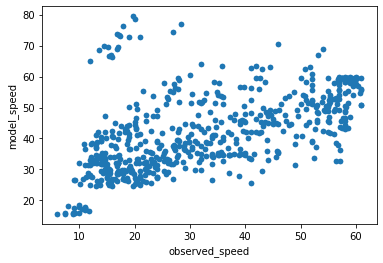

In [27]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'corridor_speeds.csv')
df.plot(kind='scatter', y='model_speed', x='observed_speed')

### AM Peak, Primary Corridors

<AxesSubplot:xlabel='observed_speed', ylabel='model_speed'>

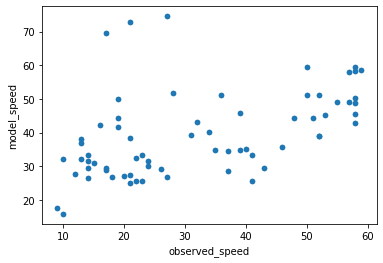

In [28]:
df[df['tod'] == '7to8'].plot(kind='scatter', x='observed_speed', y='model_speed')

In [29]:
# Show daily AM and PM peaks by corridor
df[df['tod'] == '7to8'][['Corridor_Description','model_speed','observed_speed']].head(20)

,Corridor_Description,model_speed,observed_speed
6,Seattle to Everett - NB,45,58
15,Everett to Seattle - SB,27,27
24,Tacoma to Seattle - NB,30,24
33,Seattle to Tacoma - SB,43,58
42,Bellevue to Lynnwood - NB,49,57
51,Lynnwood to Bellevue - SB,26,22
60,Tukwila to Bellevue - NB,27,20
69,Bellevue to Tukwila - SB,30,43
78,Auburn to Renton - NB,32,22
87,Renton to Auburn - SB,49,55


### PM Peak, Primary Corridors

<AxesSubplot:xlabel='observed_speed', ylabel='model_speed'>

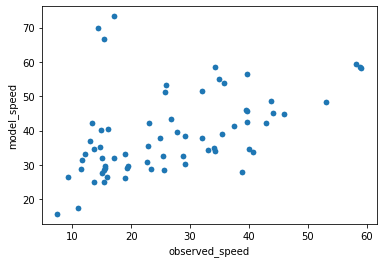

In [30]:
df[df['tod'] == '16to17'].plot(kind='scatter', x='observed_speed', y='model_speed')

In [31]:
df[df['tod'] == '16to17'][['Corridor_Description','model_speed','observed_speed']].head(20)

,Corridor_Description,model_speed,observed_speed
1,Seattle to Everett - NB,29,23
10,Everett to Seattle - SB,39,28
19,Tacoma to Seattle - NB,42,43
28,Seattle to Tacoma - SB,33,25
37,Bellevue to Lynnwood - NB,29,26
46,Lynnwood to Bellevue - SB,42,40
55,Tukwila to Bellevue - NB,30,29
64,Bellevue to Tukwila - SB,26,19
73,Auburn to Renton - NB,49,44
82,Renton to Auburn - SB,34,34
